In [1]:
from obspy.clients.fdsn.client import Client
from obspy import UTCDateTime as utc
import seaborn as sns
from Catalog import inspector
import Catalog

In [2]:
client = Client("ETH")
t1 = utc("2015-01-01T00:00:00")
t2 = utc("2015-01-11T00:00:00")
cat = client.get_events(starttime=t1,
                        endtime=t2,
                        includearrivals=True)

In [3]:
insp = Catalog.inspector(catalog=cat)

Number of calculated s-p: 168
Number of all phases: 469
Number of P-type phases: 284
Number of S-type phases: 185


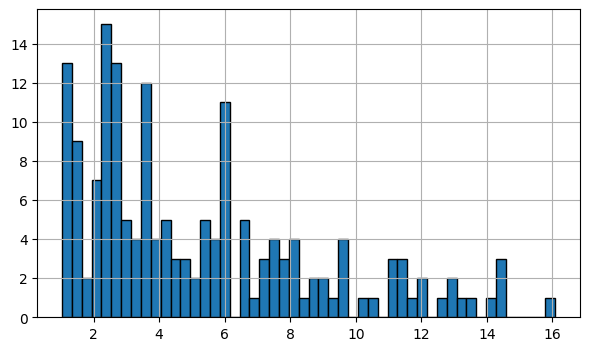

In [4]:
insp.plot_hist_SminusP(bins=50)

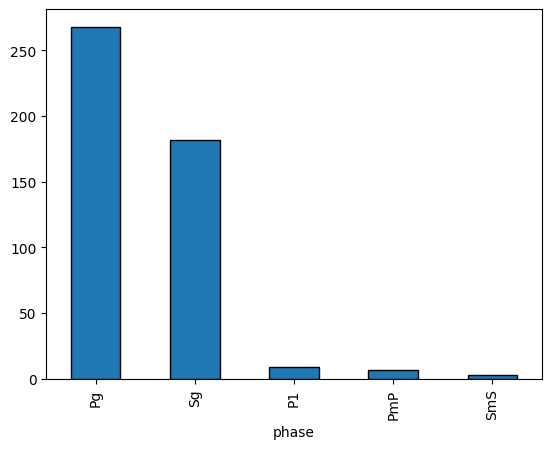

In [5]:
insp.plot_bar_phasetype()

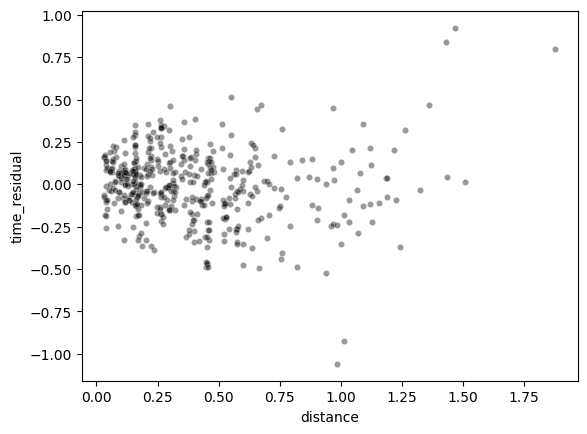

In [7]:
insp.plot_residual_vs_distance()

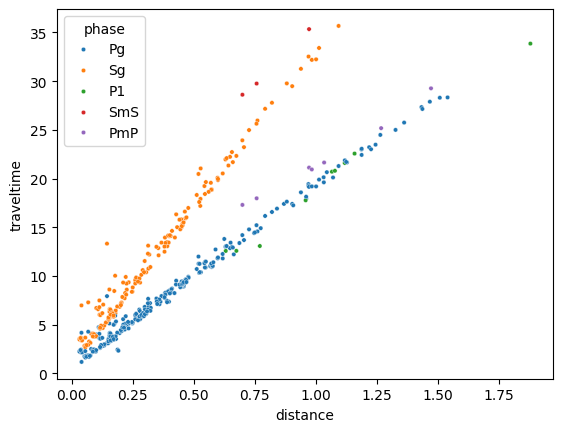

In [8]:
insp.plot_traveltime()

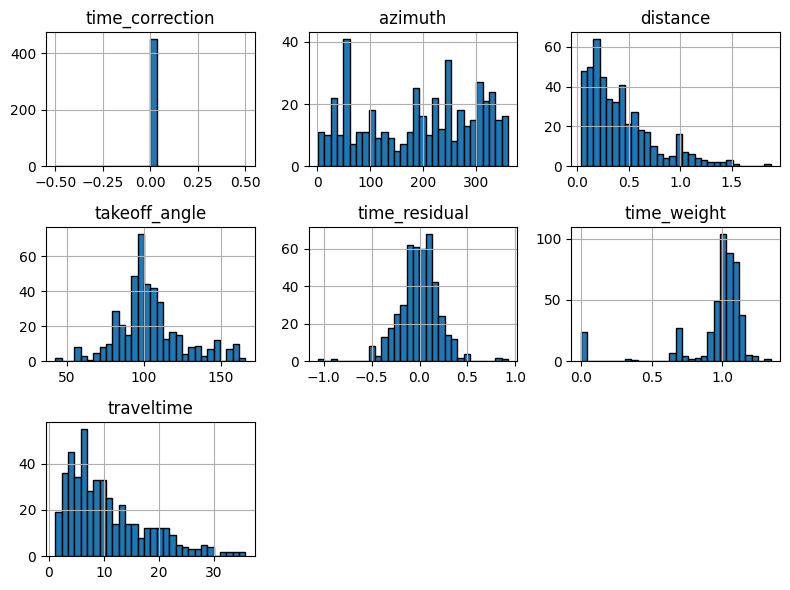

In [9]:
insp.plot_hist_of_numeric(figsize=(8, 6), bins=30, edgecolor='k')

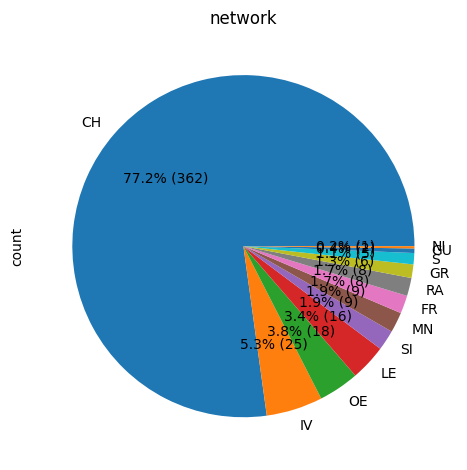

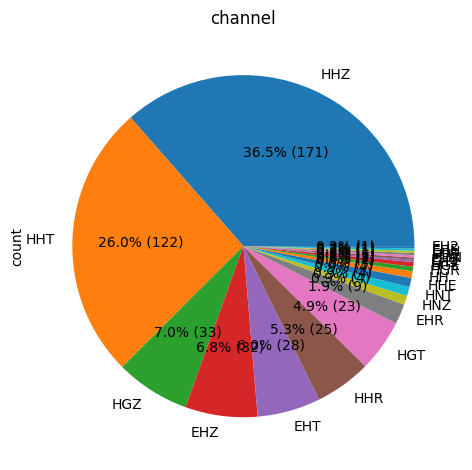

In [10]:
insp.plot_pie_of_none_numeric()

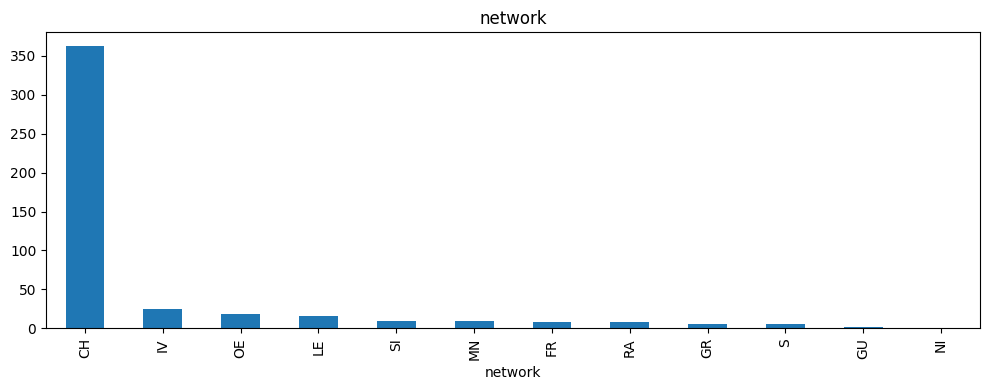

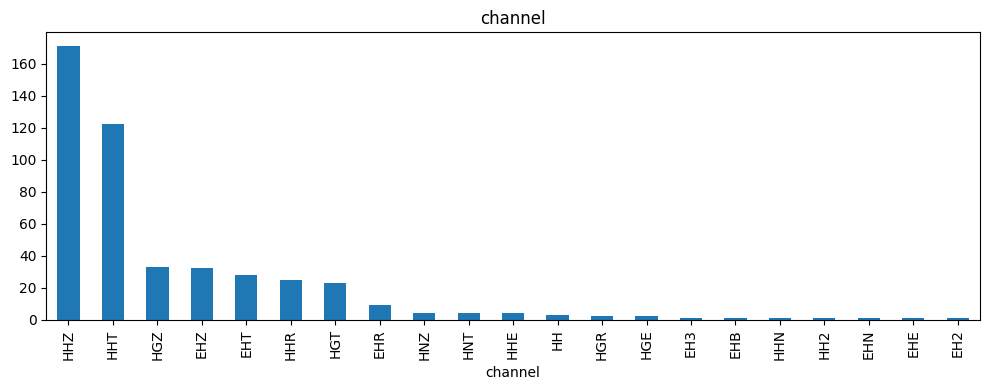

In [11]:
insp.plot_bar_of_none_numeric(figsize=(10, 4))